# 데이터마이닝 과제 #2 로지스틱회귀

## 정보융합학부 2021204051 우지윤

- EDA: bar plot, scatter plot, pie chart, histogram, correlation matrix 등 데이터 특징을 인지할 수 있도록 가시화
- 예측결과로 confusion matrix와 recall, precision, F1 measure를 측정하고 설명
- Lasso, Ridge, 그리고 Elasticnet 3가지 알고리즘 적용 후 예측 성능을 비교, 각 알고리즘의 장단점 설명

<hr>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('default of credit card clients.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.tail(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


There are 25 variables:
   
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
# Showing The Length of The Data
print("The Length of The Data: ", len(df))

The Length of The Data:  30000


In [5]:
# Showing The Shape of The Data
print("The Shape of The Data: ", df.shape)

The Shape of The Data:  (30000, 25)


In [6]:
# Showing The Information of The Data
print("The Information of The Data: ")
df.info()

The Information of The Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   300

In [7]:
# Showing The Statistical Calculations
print("The Statistical Calculations: ")
df.describe()

The Statistical Calculations: 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

- ID column이 인덱싱 목적뿐이기에 제거: The column 'ID' is dropped since it won't be needed in the analysis.

In [9]:
# Drop "ID" column
df = df.drop(['ID'], axis=1)

- 중복 열 확인, 있다면 제거

In [10]:
# Check for duplicate rows
print(f"There are {df.duplicated().sum()} duplicated rows in the data set.")

# Remove duplicate rows.
df = df.drop_duplicates()
print("The duplicate rows are removed.")

There are 35 duplicated rows in the data set.
The duplicate rows are removed.


- null값 체크하기

In [11]:
# Check for null values
print(f"There are {df.isna().any().sum()} cells with null values in the data set.")

There are 0 cells with null values in the data set.


From the info above, we have 30,000 entries and 25 columns, with no missing values.

Next, distribution plots are used to see if the data is normalized. From the two plots run below, it is clear the data is not normalized. The values will need to be scaled for accuracy. This will be done at a later point.

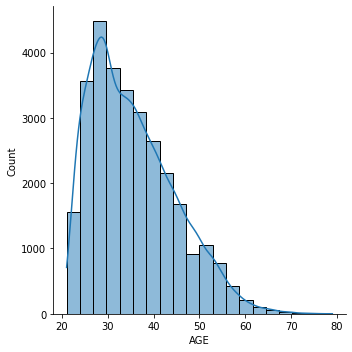

In [12]:
sns.displot(df['AGE'], bins = 20, kde = True)

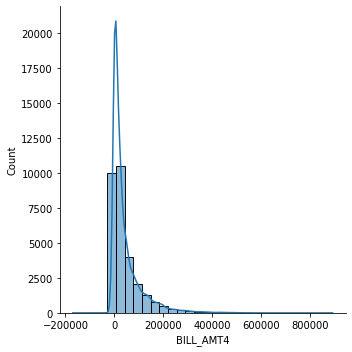

In [13]:
sns.displot(df['BILL_AMT4'], bins = 30, kde = True)

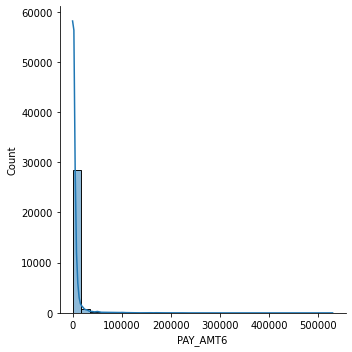

In [14]:
sns.displot(df['PAY_AMT6'], bins = 30, kde = True)

- 데이터셋의 상관관계 matrix plot
- A correlation heatmap is created to see the relationships between the variables.

<Axes: >

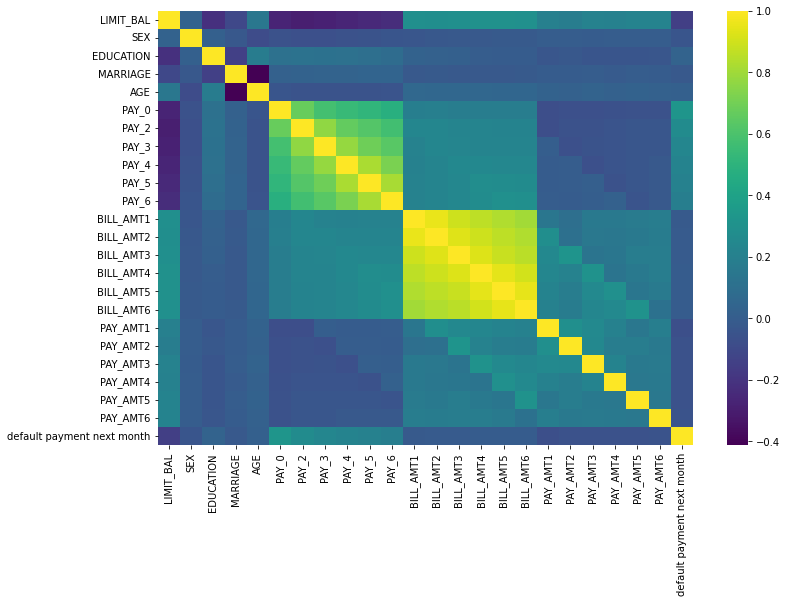

In [15]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), cmap = 'viridis')

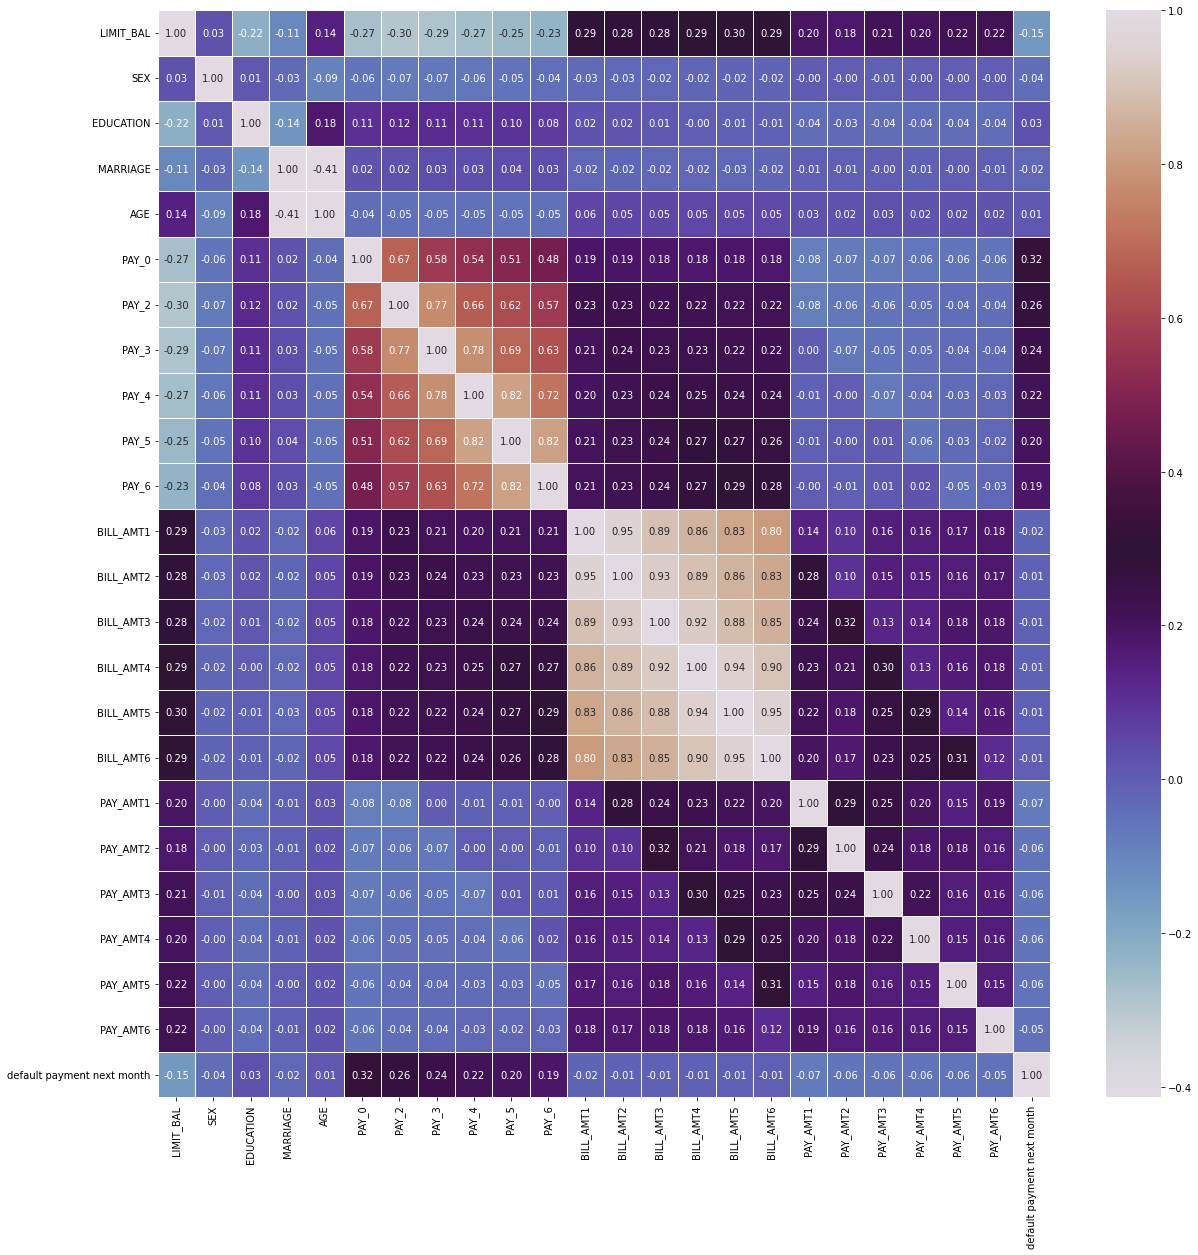

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'twilight', linewidth = 0.5, fmt = '.2f');

In [17]:
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


Countplots are created to see distribution between the sex, education, and marriage status variables.

<Axes: xlabel='SEX', ylabel='count'>

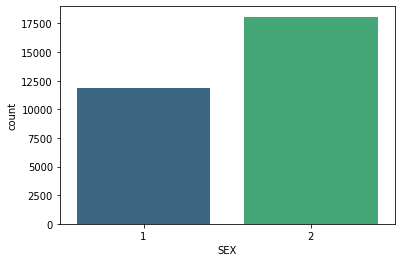

In [18]:
sns.countplot(x = 'SEX', data= df, palette = 'viridis')

<Axes: xlabel='SEX', ylabel='count'>

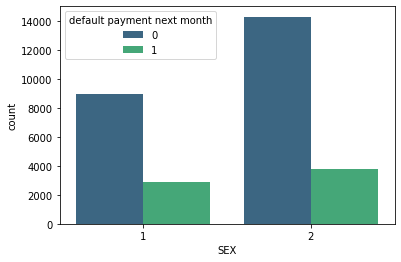

In [19]:
sns.countplot(x = 'SEX', data = df, palette = 'viridis', hue = 'default payment next month')

In [20]:
df['SEX'].value_counts()

SEX
2    18091
1    11874
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

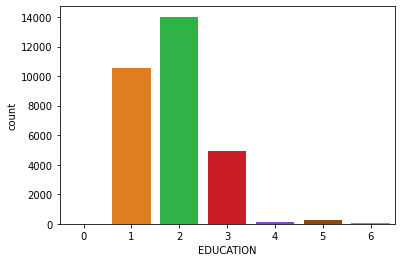

In [21]:
sns.countplot(x ='EDUCATION', data = df, palette = 'bright')

<Axes: xlabel='EDUCATION', ylabel='count'>

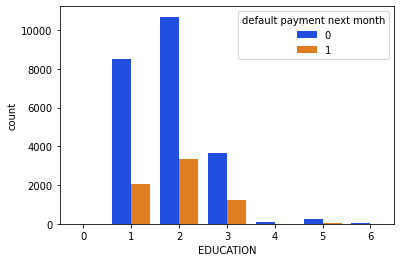

In [22]:
sns.countplot(x = 'EDUCATION', data = df, palette = 'bright', hue = 'default payment next month')

In [23]:
df['EDUCATION'].value_counts()

EDUCATION
2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: count, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

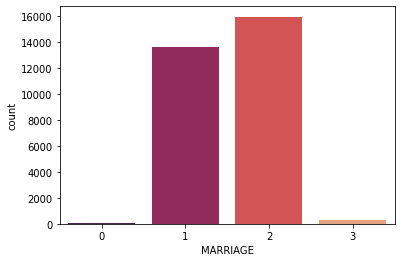

In [24]:
sns.countplot(x = 'MARRIAGE', data = df, palette = 'rocket')

<Axes: xlabel='MARRIAGE', ylabel='count'>

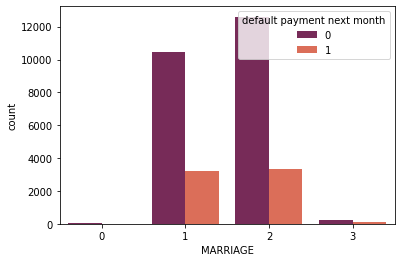

In [25]:
sns.countplot(x = 'MARRIAGE', data = df, palette = 'rocket', hue='default payment next month')

In [26]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15945
1    13643
3      323
0       54
Name: count, dtype: int64

<Axes: xlabel='SEX', ylabel='MARRIAGE'>

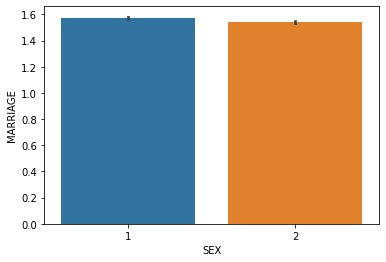

In [27]:
sns.barplot(x=df['SEX'], y=df['MARRIAGE'])

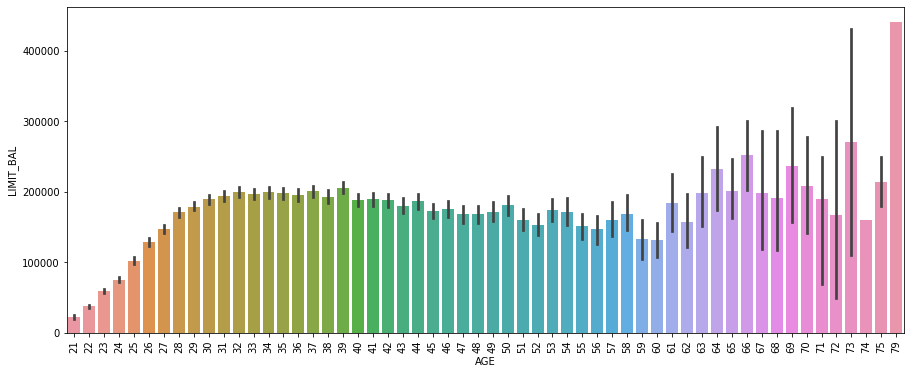

In [28]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df['AGE'], y=df['LIMIT_BAL'])
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()

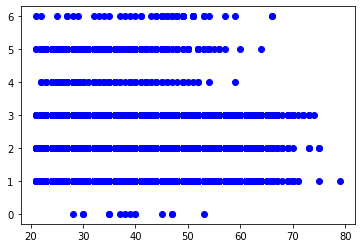

In [29]:
plt.scatter(x=df['AGE'], y=df['EDUCATION'], color='blue')

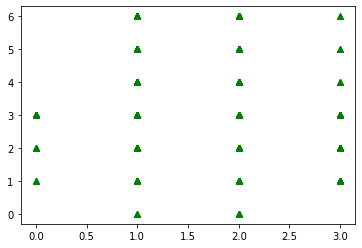

In [30]:
plt.scatter(x=df['MARRIAGE'], y=df['EDUCATION'], marker='^', color='green')

Text(0, 0.5, '')

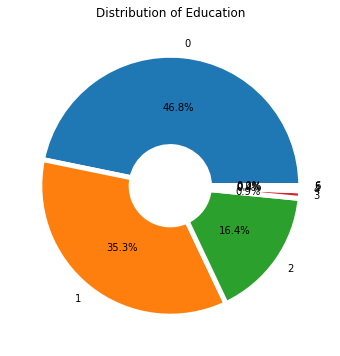

In [31]:
edu = df['EDUCATION'].value_counts()
edu_cat = ['0','1','2','3','4','5','6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# Create a pie chart
plt.figure(figsize=(6,6))
edu.plot.pie(autopct='%1.1f%%', labels=edu_cat, wedgeprops=wedgeprops)
plt.title('Distribution of Education')
plt.ylabel('') # y label 비게

In [32]:
df_under20 = np.where(df['AGE']<20)
df_under20 # 20살 미만은 없다

(array([], dtype=int64),)

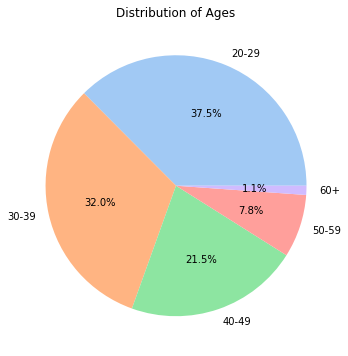

In [33]:
# Define age bins
age_bins = [20, 30, 40, 50, 60, 100]  # Adjust the bins as needed
labels = ['20-29', '30-39', '40-49', '50-59', '60+']

# Create a new column with age groups
df['AgeGroup'] = pd.cut(df['AGE'], bins=age_bins, labels=labels, right=False) # pd.cut을 이요하면 같은 길이로 구간 나눌 수 있다

# Count the occurrences in each age group
age_counts = df['AgeGroup'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(age_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Ages')
plt.show()

(array([5.120e+03, 8.247e+03, 6.511e+03, 4.804e+03, 2.603e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <BarContainer object of 10 artists>)

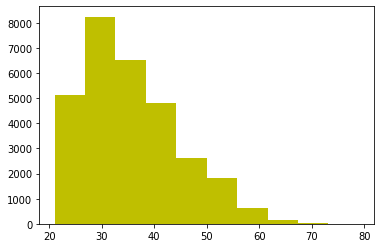

In [34]:
plt.hist(df['AGE'], color='y')

(array([ 9603.,     0., 11226.,     0.,     0.,  2341.,     0.,  6456.,
            0.,   339.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

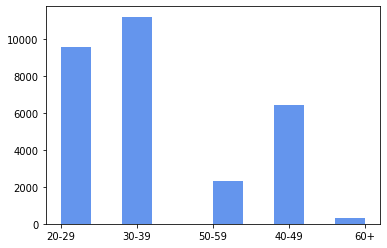

In [35]:
plt.hist(df['AgeGroup'], color='cornflowerblue')

From the above distribution plots, there appear to be outliers in the data. One way to see if there are outliers is to use box plots. A box plot is done for the amount of credit given (Limit_Bal) and the pay amount in April.

<Axes: xlabel='LIMIT_BAL'>

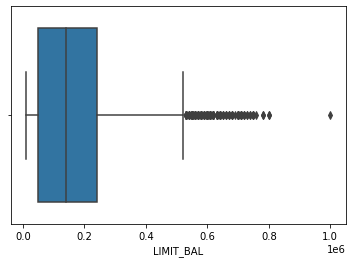

In [36]:
sns.boxplot(x = 'LIMIT_BAL', data = df)

<Axes: xlabel='PAY_AMT6'>

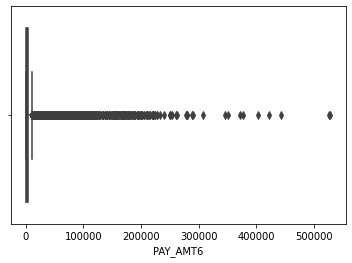

In [37]:
sns.boxplot(x = 'PAY_AMT6', data = df)

There appears to be quite a few outliers for the amount of credit given past 0.6 (600,000) and the pay amount for April above 50,000. These are most likely rare occurences of very wealthy individuals or for business purposes. To remove some of these outliers, the dataframe is redone with the limit balance capped at 550,000 and the pay amount for April capped at 50,000.

In [38]:
df = df[(df['LIMIT_BAL'] <= 550000) & (df['PAY_AMT6'] <= 50000)]

The updated dataframe is viewed to see how many participants are remaining, which appears to be 29,327 entries left. In total, about 2.24% of the original data was removed.

In [39]:
df = df.drop('AgeGroup', axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29327 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   29327 non-null  int64
 1   SEX                         29327 non-null  int64
 2   EDUCATION                   29327 non-null  int64
 3   MARRIAGE                    29327 non-null  int64
 4   AGE                         29327 non-null  int64
 5   PAY_0                       29327 non-null  int64
 6   PAY_2                       29327 non-null  int64
 7   PAY_3                       29327 non-null  int64
 8   PAY_4                       29327 non-null  int64
 9   PAY_5                       29327 non-null  int64
 10  PAY_6                       29327 non-null  int64
 11  BILL_AMT1                   29327 non-null  int64
 12  BILL_AMT2                   29327 non-null  int64
 13  BILL_AMT3                   29327 non-null  int64
 14  BILL_AMT4  

New box plots are run to see the distribution for amount of credit given and pay amount in April:

<Axes: xlabel='LIMIT_BAL'>

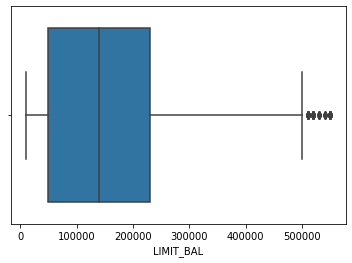

In [41]:
sns.boxplot(x = 'LIMIT_BAL', data = df)

<Axes: xlabel='PAY_AMT6'>

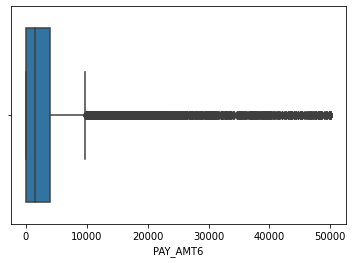

In [42]:
sns.boxplot(x = 'PAY_AMT6', data = df)

There appears to still be outliers for the pay amount in April. However, this would require a more in-depth analysis to determine the outliers. Since this is a smaller session, I will continue on with the predictive models based on the most updated dataframe.

<hr>

In [43]:
# One-hot encoding
df1 = df.copy()
df1 = pd.get_dummies(df1, columns=["SEX"])
df1 = pd.get_dummies(df1, columns=["EDUCATION"])
df1 = pd.get_dummies(df1, columns=["MARRIAGE"])

In [44]:
df1.head(2)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,False,True,False,False,False,False,False,True,False,False
1,120000,26,-1,2,0,0,0,2,2682,1725,...,False,True,False,False,False,False,False,False,True,False


## Training and Scaling the Data

As stated above, the data needs to be scaled to assist with standardizing the data. Below, all variables are scaled except for Default, since the goal is to attempt to predict whether a client will default on their credit card. The data is viewed with the new scaled data.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

In [46]:
scaler = StandardScaler()
scaler.fit(df1.drop('default payment next month', axis = 1))

StandardScaler()

In [47]:
scaled_data = scaler.transform(df1.drop('default payment next month', axis = 1))

In [48]:
df_feat = pd.DataFrame(scaled_data, columns = df1.columns[:-1])
df_feat.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2
0,-1.145938,-1.241323,1.789316,1.773333,-0.701946,-0.670775,-1.531718,-1.488442,-0.649593,-0.653633,...,-0.73317,1.062909,-0.44541,-0.064366,-0.096034,-0.039636,-0.04295,1.093899,-1.066115,-0.105198
1,-0.345691,-1.024683,-0.881770,1.773333,0.131865,0.182037,0.228359,1.981336,-0.666941,-0.673632,...,-0.73317,1.062909,-0.44541,-0.064366,-0.096034,-0.039636,-0.04295,-0.914161,0.937985,-0.105198
2,-0.585765,-0.158120,0.008592,0.105013,0.131865,0.182037,0.228359,0.246447,-0.292678,-0.494960,...,-0.73317,1.062909,-0.44541,-0.064366,-0.096034,-0.039636,-0.04295,-0.914161,0.937985,-0.105198
3,-0.905864,0.166841,0.008592,0.105013,0.131865,0.182037,0.228359,0.246447,-0.042517,0.001842,...,-0.73317,1.062909,-0.44541,-0.064366,-0.096034,-0.039636,-0.04295,1.093899,-1.066115,-0.105198
4,-0.905864,2.333247,-0.881770,0.105013,-0.701946,0.182037,0.228359,0.246447,-0.583300,-0.616336,...,-0.73317,1.062909,-0.44541,-0.064366,-0.096034,-0.039636,-0.04295,1.093899,-1.066115,-0.105198


In [49]:
features = df_feat.columns

Next, a train and test data split is created for the scaled data. This will be used for logistic regression.

train:validate:test = 49:21:30
- Train set: 49% (1 - 0.3)
- Validation set: 21% (0.3 * 0.7 = 0.21)
- Test set: 30% (0.3)
> 전체 데이터 중 49%를 Train set으로 사용하고, 나머지 51%를 Test set으로 분리한 후, 이 Test set 중 30%를 다시 Validation set으로 사용한다. 따라서 전체 데이터에 대한 비율은 49% Train, 21% Validation, 30% Test가 된다.

In [50]:
X = df_feat[features].values
y = df['default payment next month'].values

# Scaled train/validate/test split 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.30, random_state=42)

## Logistic Regression

The logistic regression model is created using the train and test splits. The logistic model is fit (or "trained") with the training set, then the model is tested on the testing set

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

검증 데이터

In [52]:
# Make predictions on the validation set
y_val_pred = logmodel.predict(X_val)

테스트 데이터

In [53]:
predictions = logmodel.predict(X_test)

A confusion matrix and classification report are created to see how well the logistic regression model performed.

검증 데이터

In [54]:
print(confusion_matrix(y_val, y_val_pred))

[[4621  149]
 [1048  341]]


테스트 데이터

In [55]:
print(confusion_matrix(y_test, predictions))

[[1992   57]
 [ 454  137]]


검증 데이터

In [56]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4770
           1       0.70      0.25      0.36      1389

    accuracy                           0.81      6159
   macro avg       0.76      0.61      0.62      6159
weighted avg       0.79      0.81      0.77      6159



테스트 데이터

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2049
           1       0.71      0.23      0.35       591

    accuracy                           0.81      2640
   macro avg       0.76      0.60      0.62      2640
weighted avg       0.79      0.81      0.77      2640



검증 데이터

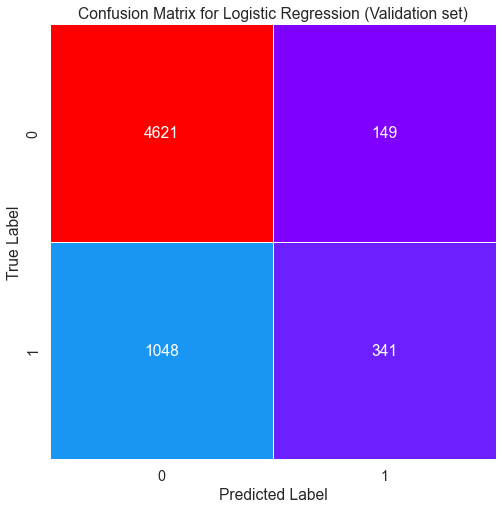

In [58]:
lg_matrix1 = confusion_matrix(y_val, y_val_pred)

sns.set(font_scale = 1.3)
plt.subplots(figsize = (8, 8))
sns.heatmap(lg_matrix1, annot = True, cbar = False, cmap = 'rainbow', linewidth = 0.5, fmt = "d")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression (Validation set)');
plt.grid(False)

테스트 데이터

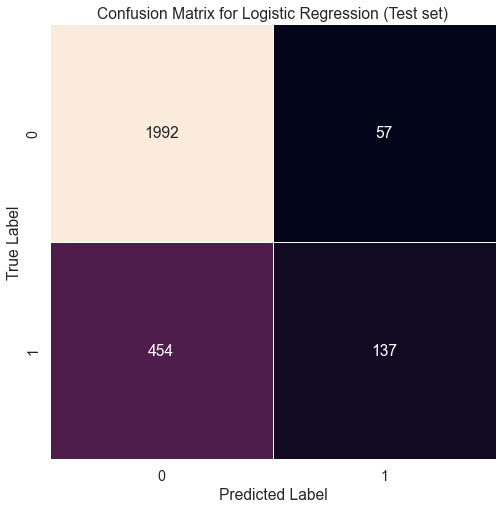

In [59]:
lg_matrix2 = confusion_matrix(y_test, predictions)

sns.set(font_scale = 1.3)
plt.subplots(figsize = (8, 8))
sns.heatmap(lg_matrix2, annot = True, cbar = False, linewidth = 0.5, fmt = "d")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression (Test set)');
plt.grid(False)

검증 데이터 정확도

In [60]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set
y_val_pred_logreg = logmodel.predict(X_val)

# Evaluate the logistic regression model on the validation set
accuracy_val_logreg = accuracy_score(y_val, y_val_pred_logreg)

print(f"Logistic Regression Model Validation Accuracy: {accuracy_val_logreg}")

Logistic Regression Model Validation Accuracy: 0.8056502679006332


테스트 데이터

In [61]:
# Make predictions on the test set
y_test_pred_logreg = logmodel.predict(X_test)

# Evaluate the logistic regression model on the test set
accuracy_test_logreg = accuracy_score(y_test, y_test_pred_logreg)

print(f"Logistic Regression Model Test Accuracy: {accuracy_test_logreg}")

Logistic Regression Model Test Accuracy: 0.8064393939393939


In [62]:
from sklearn.model_selection import train_test_split, cross_val_score

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'predictions' is your model's predictions
# Assuming 'y_test' is the true labels

# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % logmodel.score(X_test, y_test))

# Cross-Validation accuracy
#CV score
logreg_cv=cross_val_score(logmodel, X_train, y_train, cv=10).mean()
print('Cross-validation accuracy: %0.3f' % logreg_cv)

# Precision
precision = precision_score(y_test, predictions)
print('Precision: %.3f' % precision)

# Recall
recall = recall_score(y_test, predictions)
print('Recall: %.3f' % recall)

# F1 Score
f1 = f1_score(y_test, predictions)
print('F1 score: %.3f' % f1)

Accuracy: 0.806
Cross-validation accuracy: 0.810
Precision: 0.706
Recall: 0.232
F1 score: 0.349


Lasso. Ridge, Elasticnet model

In [64]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import numpy as np

# Initialize the linear regression model
lasso_model = Lasso(alpha=0.1) # alpha = Lambda
ridge_model = Ridge(alpha=0.1) 
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [65]:
# Train the models on the training set
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [66]:
# Make predictions on the validation set
y_val_pred_lasso = lasso_model.predict(X_val)
y_val_pred_ridge = ridge_model.predict(X_val)
y_val_pred_elasticnet = elasticnet_model.predict(X_val)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

검증 데이터 성능 평가-Lasso

In [68]:
# Initialize logistic regression model with Lasso regularization and liblinear solver
lasso_logreg_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Train the model on the training set
lasso_logreg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_lasso_logreg = lasso_logreg_model.predict(X_val)

# Evaluate the model
accuracy_lasso_logreg = accuracy_score(y_val, y_val_pred_lasso_logreg)
precision_lasso_logreg = precision_score(y_val, y_val_pred_lasso_logreg)
recall_lasso_logreg = recall_score(y_val, y_val_pred_lasso_logreg)
f1_lasso_logreg = f1_score(y_val, y_val_pred_lasso_logreg)

# Print evaluation metrics
print("Validation Set Evaluation - Logistic Regression with Lasso Regularization\n")
print(f"Accuracy: {accuracy_lasso_logreg:.4f}")
print(f"Precision: {precision_lasso_logreg:.4f}")
print(f"Recall: {recall_lasso_logreg:.4f}")
print(f"F1 Score: {f1_lasso_logreg:.4f}")

Validation Set Evaluation - Logistic Regression with Lasso Regularization

Accuracy: 0.8057
Precision: 0.6959
Recall: 0.2455
F1 Score: 0.3630


테스트 데이터 성능 평가-Lasso

In [69]:
# Make predictions on the test set using the trained Lasso logistic regression model
y_test_pred_lasso_logreg = lasso_logreg_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_lasso_logreg = accuracy_score(y_test, y_test_pred_lasso_logreg)
precision_test_lasso_logreg = precision_score(y_test, y_test_pred_lasso_logreg)
recall_test_lasso_logreg = recall_score(y_test, y_test_pred_lasso_logreg)
f1_test_lasso_logreg = f1_score(y_test, y_test_pred_lasso_logreg)

# Print evaluation metrics for the test set
print("Test Set Evaluation - Logistic Regression with Lasso Regularization\n")
print(f"Accuracy: {accuracy_test_lasso_logreg:.4f}")
print(f"Precision: {precision_test_lasso_logreg:.4f}")
print(f"Recall: {recall_test_lasso_logreg:.4f}")
print(f"F1 Score: {f1_test_lasso_logreg:.4f}")

Test Set Evaluation - Logistic Regression with Lasso Regularization

Accuracy: 0.8064
Precision: 0.7062
Recall: 0.2318
F1 Score: 0.3490


검증 데이터 성능 평가-Ridge

In [70]:
# Initialize logistic regression model with Ridge regularization
ridge_logreg_model = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0)

# Train the model on the training set
ridge_logreg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_ridge_logreg = ridge_logreg_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_ridge_logreg = accuracy_score(y_val, y_val_pred_ridge_logreg)
precision_val_ridge_logreg = precision_score(y_val, y_val_pred_ridge_logreg)
recall_val_ridge_logreg = recall_score(y_val, y_val_pred_ridge_logreg)
f1_val_ridge_logreg = f1_score(y_val, y_val_pred_ridge_logreg)

# Print evaluation metrics for the validation set
print("Validation Set Evaluation - Logistic Regression with Ridge Regularization\n")
print(f"Accuracy: {accuracy_val_ridge_logreg:.4f}")
print(f"Precision: {precision_val_ridge_logreg:.4f}")
print(f"Recall: {recall_val_ridge_logreg:.4f}")
print(f"F1 Score: {f1_val_ridge_logreg:.4f}")

Validation Set Evaluation - Logistic Regression with Ridge Regularization

Accuracy: 0.8057
Precision: 0.6959
Recall: 0.2455
F1 Score: 0.3630


테스트 데이터 성능 평가-Ridge

In [71]:
# Make predictions on the test set
y_test_pred_ridge_logreg = ridge_logreg_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_ridge_logreg = accuracy_score(y_test, y_test_pred_ridge_logreg)
precision_test_ridge_logreg = precision_score(y_test, y_test_pred_ridge_logreg)
recall_test_ridge_logreg = recall_score(y_test, y_test_pred_ridge_logreg)
f1_test_ridge_logreg = f1_score(y_test, y_test_pred_ridge_logreg)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation - Logistic Regression with Ridge Regularization\n")
print(f"Accuracy: {accuracy_test_ridge_logreg:.4f}")
print(f"Precision: {precision_test_ridge_logreg:.4f}")
print(f"Recall: {recall_test_ridge_logreg:.4f}")
print(f"F1 Score: {f1_test_ridge_logreg:.4f}")


Test Set Evaluation - Logistic Regression with Ridge Regularization

Accuracy: 0.8064
Precision: 0.7062
Recall: 0.2318
F1 Score: 0.3490


검증 데이터 성능 평가-Elasticnet

In [72]:
# Initialize logistic regression model with Elastic Net regularization
elasticnet_logreg_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)

# Train the model on the training set
elasticnet_logreg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_elasticnet_logreg = elasticnet_logreg_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val_elasticnet_logreg = accuracy_score(y_val, y_val_pred_elasticnet_logreg)
precision_val_elasticnet_logreg = precision_score(y_val, y_val_pred_elasticnet_logreg)
recall_val_elasticnet_logreg = recall_score(y_val, y_val_pred_elasticnet_logreg)
f1_val_elasticnet_logreg = f1_score(y_val, y_val_pred_elasticnet_logreg)

# Print evaluation metrics for the validation set
print("Validation Set Evaluation - Logistic Regression with Elastic Net Regularization\n")
print(f"Accuracy: {accuracy_val_elasticnet_logreg:.4f}")
print(f"Precision: {precision_val_elasticnet_logreg:.4f}")
print(f"Recall: {recall_val_elasticnet_logreg:.4f}")
print(f"F1 Score: {f1_val_elasticnet_logreg:.4f}")

Validation Set Evaluation - Logistic Regression with Elastic Net Regularization

Accuracy: 0.8058
Precision: 0.6965
Recall: 0.2462
F1 Score: 0.3638


C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


테스트 데이터 성능 평가-Elasticnet

In [73]:
# Make predictions on the test set
y_test_pred_elasticnet_logreg = elasticnet_logreg_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test_elasticnet_logreg = accuracy_score(y_test, y_test_pred_elasticnet_logreg)
precision_test_elasticnet_logreg = precision_score(y_test, y_test_pred_elasticnet_logreg)
recall_test_elasticnet_logreg = recall_score(y_test, y_test_pred_elasticnet_logreg)
f1_test_elasticnet_logreg = f1_score(y_test, y_test_pred_elasticnet_logreg)

# Print evaluation metrics for the test set
print("\nTest Set Evaluation - Logistic Regression with Elastic Net Regularization:")
print(f"Accuracy: {accuracy_test_elasticnet_logreg:.4f}")
print(f"Precision: {precision_test_elasticnet_logreg:.4f}")
print(f"Recall: {recall_test_elasticnet_logreg:.4f}")
print(f"F1 Score: {f1_test_elasticnet_logreg:.4f}")


Test Set Evaluation - Logistic Regression with Elastic Net Regularization:
Accuracy: 0.8064
Precision: 0.7062
Recall: 0.2318
F1 Score: 0.3490
